In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
params = dict(np.load('output/consistent_mask_0.05_0.01/basketball/params.npz'))

In [23]:
params.keys()

dict_keys(['means3D', 'rgb_colors', 'seg_colors', 'unnorm_rotations', 'logit_opacities', 'mask', 'log_scales', 'cam_m', 'cam_c'])

In [24]:
params["mask"].shape

(150, 316218, 1)

In [25]:
masks = params["mask"]

masks_sigmoid = 1 / (1 + np.exp(-masks)).squeeze()

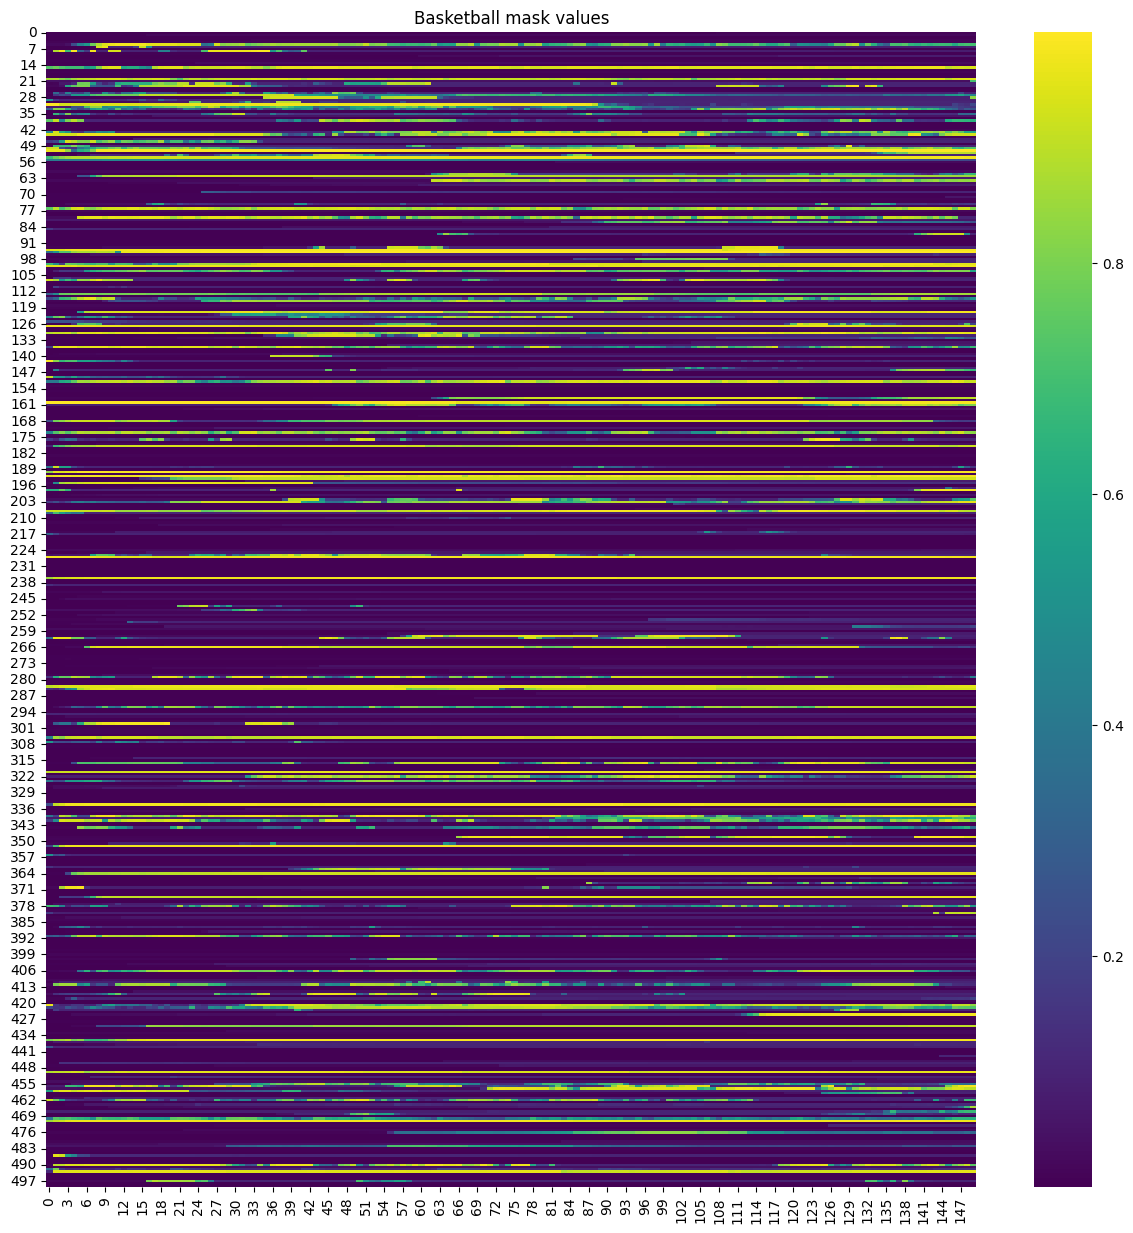

In [26]:
# plot 2D heatmap of sampled mask values

plt.figure(figsize=(15, 15))
sns.heatmap(masks_sigmoid.T[np.random.choice(masks_sigmoid.T.shape[0], size=500, replace=False), :], cmap="viridis")
plt.title("Basketball mask values")
plt.show()



In [39]:
gaussian_masks = masks_sigmoid.T

In [40]:
mean_gaussian_mask = np.mean(gaussian_masks, axis=1)

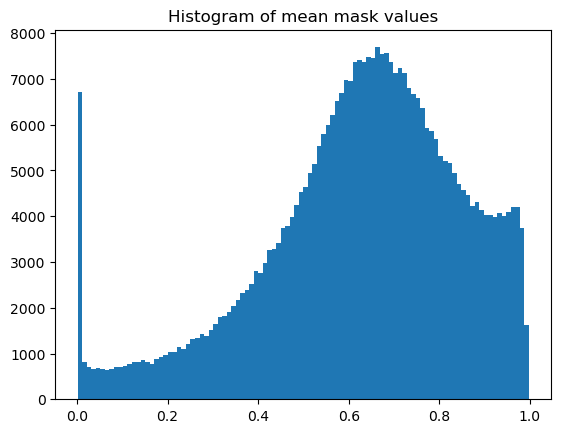

In [41]:
# Histogram of mean mask values
plt.hist(mean_gaussian_mask, bins=100)
plt.title("Histogram of mean mask values")
plt.show()

In [42]:
# Total Gaussians
print("Total number of Gaussians: ", gaussian_masks.shape[0])
# count of masks with mean value below 0.1
print("Number of masks with mean value below 0.1: ", np.sum(mean_gaussian_mask < 0.01))
# Percentage of masks with mean value below 0.1
print("Percentage of masks with mean value below 0.1: ", np.sum(mean_gaussian_mask < 0.01) / gaussian_masks.shape[0] * 100)

Total number of Gaussians:  374271
Number of masks with mean value below 0.1:  6555
Percentage of masks with mean value below 0.1:  1.751404730796669


Average change in mask value:  0.20398617
Maximum change in mask value:  0.9984284
Standard deviation of change in mask value:  0.22959112


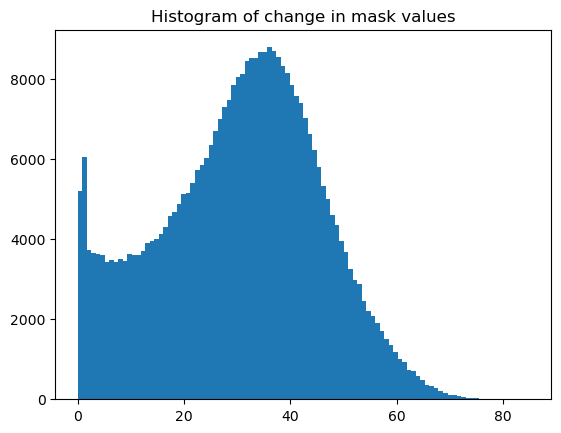

In [43]:
# Average change in mask value
print("Average change in mask value: ", np.mean(np.abs(np.diff(gaussian_masks, axis=1))))
# Maximum change in mask value
print("Maximum change in mask value: ", np.max(np.abs(np.diff(gaussian_masks, axis=1))))
# Standard deviation of change in mask value
print("Standard deviation of change in mask value: ", np.std(np.abs(np.diff(gaussian_masks, axis=1))))

# Histogram of change in mask values
plt.hist(np.sum(np.abs(np.diff(gaussian_masks, axis=1)), axis=1), bins=100)
plt.title("Histogram of change in mask values")
plt.show()

Mean overlap between masks lower than 0.1:  0.04757162590743071
Count of mean overlap = 1:  459
Percentage of mean overlap = 1:  0.12263840906722669
Count of mean overlap = 0:  290703
Percentage of mean overlap = 0:  77.67179396747277


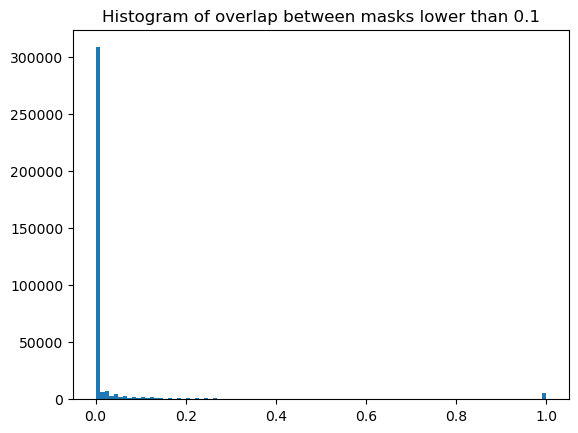

In [44]:
# Overlap between masks lower than 0.1

masks_lower_than_01 = gaussian_masks < 0.01

overlap = np.sum(masks_lower_than_01, axis=1) / masks_lower_than_01.shape[1]

mean_overlap = np.mean(overlap)
print("Mean overlap between masks lower than 0.01: ", mean_overlap)

# Count of mean overlap = 1
print("Count of mean overlap = 1: ", np.sum(overlap == 1))
# Percentage of mean overlap = 1
print("Percentage of mean overlap = 1: ", np.sum(overlap == 1) / overlap.shape[0] * 100)

# Count of mean overlap = 0
print("Count of mean overlap = 0: ", np.sum(overlap == 0))
# Percentage of mean overlap = 0
print("Percentage of mean overlap = 0: ", np.sum(overlap == 0) / overlap.shape[0] * 100)



# Histogram of overlap between masks lower than 0.1
plt.hist(overlap, bins=100)
plt.title("Histogram of overlap between masks lower than 0.1")
plt.show()


In [13]:
# # Rerun the above analysis for the other datasets

# params = dict(np.load('output/output/baseline_mask/juggle/params.npz'))

# masks = params["mask"]
# masks_sigmoid = 1 / (1 + np.exp(-masks)).squeeze()

# # plot 2D heatmap of sampled mask values

# plt.figure(figsize=(15, 15))
# sns.heatmap(masks_sigmoid.T, cmap="viridis")
# plt.title("Juggle mask values")
# plt.show()

# gaussian_masks = masks_sigmoid.T
# mean_gaussian_mask = np.mean(gaussian_masks, axis=1)

# # Histogram of mean mask values
# plt.hist(mean_gaussian_mask, bins=100)
# plt.title("Histogram of mean mask values")
# plt.show()

# # Total Gaussians
# print("Total number of Gaussians: ", gaussian_masks.shape[0])

# # count of masks with mean value below 0.1
# print("Number of masks with mean value below 0.1: ", np.sum(mean_gaussian_mask < 0.1))

# # Percentage of masks with mean value below 0.1
# print("Percentage of masks with mean value below 0.1: ", np.sum(mean_gaussian_mask < 0.1) / gaussian_masks.shape[0] * 100)

# # Average change in mask value
# print("Average change in mask value: ", np.mean(np.abs(np.diff(gaussian_masks, axis=1))))

# # Histogram of change in mask values
# plt.hist(np.abs(np.diff(gaussian_masks, axis=1)).flatten(), bins=100)
# plt.title("Histogram of change in mask values")
# plt.show()

In [14]:
# # Rerun the above analysis for the other datasets

# params = dict(np.load('output/output/baseline_mask/tennis/params.npz'))

# masks = params["mask"]
# masks_sigmoid = 1 / (1 + np.exp(-masks)).squeeze()

# # plot 2D heatmap of sampled mask values

# plt.figure(figsize=(15, 15))
# sns.heatmap(masks_sigmoid.T, cmap="viridis")
# plt.title("Juggle mask values")
# plt.show()

# gaussian_masks = masks_sigmoid.T
# mean_gaussian_mask = np.mean(gaussian_masks, axis=1)

# # Histogram of mean mask values
# plt.hist(mean_gaussian_mask, bins=100)
# plt.title("Histogram of mean mask values")
# plt.show()

# # Total Gaussians
# print("Total number of Gaussians: ", gaussian_masks.shape[0])

# # count of masks with mean value below 0.1
# print("Number of masks with mean value below 0.1: ", np.sum(mean_gaussian_mask < 0.1))

# # Percentage of masks with mean value below 0.1
# print("Percentage of masks with mean value below 0.1: ", np.sum(mean_gaussian_mask < 0.1) / gaussian_masks.shape[0] * 100)

# # Average change in mask value
# print("Average change in mask value: ", np.mean(np.abs(np.diff(gaussian_masks, axis=1))))

# # Histogram of change in mask values
# plt.hist(np.abs(np.diff(gaussian_masks, axis=1)).flatten(), bins=100)
# plt.title("Histogram of change in mask values")
# plt.show()